In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import seaborn as sns

wine_data = pd.read_csv('C:/Users/Sandi/Downloads/Wine.csv',
                           sep= ',', header= None)
wine_data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print(wine_data.head())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

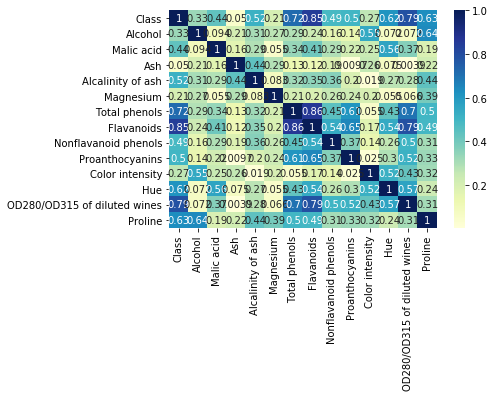

In [18]:
correlations = wine_data[wine_data.columns].corr(method='pearson')
sns.heatmap(abs(correlations), cmap="YlGnBu", annot = True)

In [29]:
#------- BEFORE CLEANING --------#
X_bc = wine_data.values[:, 1:]
Y_bc = wine_data.values[:,0]
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split( X_bc, Y_bc, test_size = 0.2, random_state=0)

print('Size of training data set:', len(X_train_bc))
print('Size of testing data set:', len(X_test_bc))

Size of training data set: 142
Size of testing data set: 36


In [30]:
#----------AFTER CLEANING-----------------------------------------------------
# Columns selected after manual analysis
to_drop = ['Malic acid', 'Ash',  'Magnesium', 'Total phenols', 'Nonflavanoid phenols', 'Proanthocyanins']
#to_drop = ['Ash']
wine_data.drop(to_drop, inplace=True, axis=1)
X_ac = wine_data.values[:, 1:]
Y_ac = wine_data.values[:,0]
X_train_ac, X_test_ac, y_train_ac, y_test_ac = train_test_split( X_ac, Y_ac, test_size = 0.2, random_state=0)
print('Size of training data set:', len(X_train_ac))
print('Size of testing data set:', len(X_test_ac))


Size of training data set: 142
Size of testing data set: 36


In [31]:
#DTC
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               min_samples_split =3)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0,
                               min_samples_split =3)

#KNN
knn = KNeighborsClassifier(n_neighbors=25)

#NAIVE BAYES
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

In [32]:
#-------------DTC-------------------------------------------------------------
#before cleaning
clf_gini.fit(X_train_bc, y_train_bc)
clf_entropy.fit(X_train_bc, y_train_bc)
y_pred_bc_DTC_gini = clf_gini.predict(X_test_bc)
y_pred_bc_DTC_entropy = clf_entropy.predict(X_test_bc)
print("Accuracy of DTC (gini)[Before Cleaning]: ", metrics.accuracy_score(y_test_bc,y_pred_bc_DTC_gini)*100)
print("Accuracy of DTC (entropy)[Before Cleaning]:", metrics.accuracy_score(y_test_bc,y_pred_bc_DTC_entropy)*100)

Accuracy of DTC (gini)[Before Cleaning]:  97.22222222222221
Accuracy of DTC (entropy)[Before Cleaning]: 91.66666666666666


In [33]:
#-------------KNN-------------------------------------------------------------
#before cleaning
knn.fit(X_train_bc, y_train_bc)
y_pred_bc_knn = knn.predict(X_test_bc)
print("Accuracy of KNN[Before Cleaning]:",metrics.accuracy_score(y_test_bc, y_pred_bc_knn)*100)

Accuracy of KNN[Before Cleaning]: 75.0


In [34]:
#------------NAIVE BAYES------------------------------------------------------
#before cleaning
y_pred_bc_gnb = gnb.fit(X_train_bc, y_train_bc).predict(X_test_bc)
y_pred_bc_mnb = mnb.fit(X_train_bc, y_train_bc).predict(X_test_bc)
y_pred_bc_cnb = cnb.fit(X_train_bc, y_train_bc).predict(X_test_bc)
print("Accuracy of GNB[Before Cleaning]:",metrics.accuracy_score(y_test_bc, y_pred_bc_gnb)*100)
print("Accuracy of MNB[Before Cleaning]:",metrics.accuracy_score(y_test_bc, y_pred_bc_mnb)*100)
print("Accuracy of CNB[Before Cleaning]:",metrics.accuracy_score(y_test_bc, y_pred_bc_cnb)*100)

Accuracy of GNB[Before Cleaning]: 91.66666666666666
Accuracy of MNB[Before Cleaning]: 86.11111111111111
Accuracy of CNB[Before Cleaning]: 77.77777777777779


In [35]:
#------------------DTC--------------------------------------------------------
clf_gini.fit(X_train_ac, y_train_ac)
clf_entropy.fit(X_train_ac, y_train_ac)
y_pred_ac_DTC_gini = clf_gini.predict(X_test_ac)
y_pred_ac_DTC_entropy = clf_entropy.predict(X_test_ac)

print("Accuracy of DTC (gini) [After Cleaning]:", metrics.accuracy_score(y_test_ac,y_pred_ac_DTC_gini)*100)
print("Accuracy of DTC (entropy) [After Cleaning]:", metrics.accuracy_score(y_test_ac,y_pred_ac_DTC_entropy)*100)


Accuracy of DTC (gini) [After Cleaning]: 97.22222222222221
Accuracy of DTC (entropy) [After Cleaning]: 97.22222222222221


In [36]:
#-------------KNN-------------------------------------------------------------
knn.fit(X_train_ac, y_train_ac)
y_pred_ac_knn = knn.predict(X_test_ac)
print("Accuracy of KNN [After Cleaning]:",metrics.accuracy_score(y_test_ac, y_pred_ac_knn)*100)

Accuracy of KNN [After Cleaning]: 75.0


In [37]:
#------------NAIVE BAYES------------------------------------------------------
#
y_pred_ac_gnb = gnb.fit(X_train_ac, y_train_ac).predict(X_test_ac)
y_pred_ac_mnb = mnb.fit(X_train_ac, y_train_ac).predict(X_test_ac)
y_pred_ac_cnb = cnb.fit(X_train_ac, y_train_ac).predict(X_test_ac)
print("Accuracy of GNB [After Cleaning]:",metrics.accuracy_score(y_test_ac, y_pred_ac_gnb)*100)
print("Accuracy of MNB [After Cleaning]:",metrics.accuracy_score(y_test_ac, y_pred_ac_mnb)*100)
print("Accuracy of CNB [After Cleaning]:",metrics.accuracy_score(y_test_ac, y_pred_ac_cnb)*100)


Accuracy of GNB [After Cleaning]: 94.44444444444444
Accuracy of MNB [After Cleaning]: 91.66666666666666
Accuracy of CNB [After Cleaning]: 88.88888888888889
